In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import truncnorm


# Crystal Ball PDF
def crystal_ball_pdf(x, mu, sigma, beta, m):
    z = (x - mu) / sigma
    if z > -beta:
        return np.exp(-z**2 / 2)
    else:
        A = (m / beta)**m * np.exp(-beta**2 / 2)
        B = m / beta - beta
        return A * (B - z)**-m

# Signal distribution g_s(X)
def g_s(x, mu, sigma, beta, m):
    if x < 0 or x > 5:
        return 0
    pdf_unnorm = crystal_ball_pdf(x, mu, sigma, beta, m)
    normalization_constant, _ = quad(lambda x: crystal_ball_pdf(x, mu, sigma, beta, m), 0, 5)
    return pdf_unnorm / normalization_constant

# Signal distribution h_s(Y)
def h_s(y, lambda_s):
    if y < 0 or y > 10:
        return 0
    normalization_constant = 1 - np.exp(-lambda_s * 10)
    return lambda_s * np.exp(-lambda_s * y) / normalization_constant

# Background distribution g_b(X)
def g_b(x):
    return 1 / 5 if 0 <= x <= 5 else 0

# Background distribution h_b(Y)
def h_b(y, mu_b, sigma_b):
    if y < 0 or y > 10:
        return 0
    a, b = (0 - mu_b) / sigma_b, (10 - mu_b) / sigma_b
    h_b_dist = truncnorm(a, b, loc=mu_b, scale=sigma_b)
    return h_b_dist.pdf(y)

# Combined distribution f(X, Y)
def f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal):
    return (
        f_signal * g_s(x, mu, sigma, beta, m) * h_s(y, lambda_s) +
        (1 - f_signal) * g_b(x) * h_b(y, mu_b, sigma_b)
    )

# Test normalization for a single set of parameters
def test_normalization(mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal):
    # Check g_s(X)
    g_s_norm, _ = quad(lambda x: g_s(x, mu, sigma, beta, m), 0, 5)

    # Check h_s(Y)
    h_s_norm, _ = quad(lambda y: h_s(y, lambda_s), 0, 10)

    # Check g_b(X)
    g_b_norm, _ = quad(g_b, 0, 5)

    # Check h_b(Y)
    h_b_norm, _ = quad(lambda y: h_b(y, mu_b, sigma_b), 0, 10)

    # Check f(X, Y)
    def integrand_x(x):
        result, _ = quad(lambda y: f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal), 0, 10)
        return result

    f_xy_norm, _ = quad(integrand_x, 0, 5)

    return g_s_norm, h_s_norm, g_b_norm, h_b_norm, f_xy_norm

# Systematic test with random parameter combinations
def systematic_test(num_tests=10):
    results = {
        "g_s(X)": [],
        "h_s(Y)": [],
        "g_b(X)": [],
        "h_b(Y)": [],
        "f(X, Y)": []
    }

    np.random.seed(42)  # For reproducibility

    for _ in range(num_tests):
        # Randomly generate parameters
        mu = np.random.uniform(2, 4)  # Mean for g_s(X)
        sigma = np.random.uniform(0.2, 0.6)  # Std for g_s(X)
        beta = np.random.uniform(0.5, 2)  # Beta for g_s(X)
        m = np.random.uniform(1.1, 3)  # m for g_s(X)
        lambda_s = np.random.uniform(0.1, 0.5)  # Lambda for h_s(Y)
        mu_b = np.random.uniform(-1, 2)  # Mean for h_b(Y)
        sigma_b = np.random.uniform(1, 4)  # Std for h_b(Y)
        f_signal = np.random.uniform(0.3, 0.8)  # Signal fraction

        # Test normalization
        g_s_norm, h_s_norm, g_b_norm, h_b_norm, f_xy_norm = test_normalization(mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal)

        # Store results
        results["g_s(X)"].append(g_s_norm)
        results["h_s(Y)"].append(h_s_norm)
        results["g_b(X)"].append(g_b_norm)
        results["h_b(Y)"].append(h_b_norm)
        results["f(X, Y)"].append(f_xy_norm)

    # Calculate average normalization for each component
    averages = {key: np.mean(values) for key, values in results.items()}
    print("\nAverage normalization values across all tests:")
    for key, value in averages.items():
        print(f"{key}: {value}")

    # Return detailed results
    return results



In [ ]:

# Run the systematic test
systematic_results = systematic_test()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Reset parameters
mu = 3
sigma = 0.3
beta = 1
m = 1.4
lambda_s = 0.3
mu_b = 0
sigma_b = 2.5
f_signal = 0.6


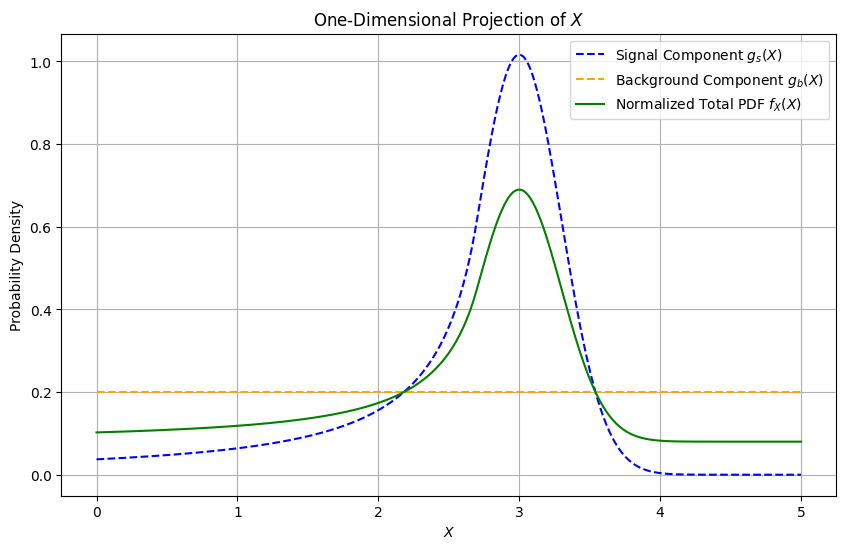

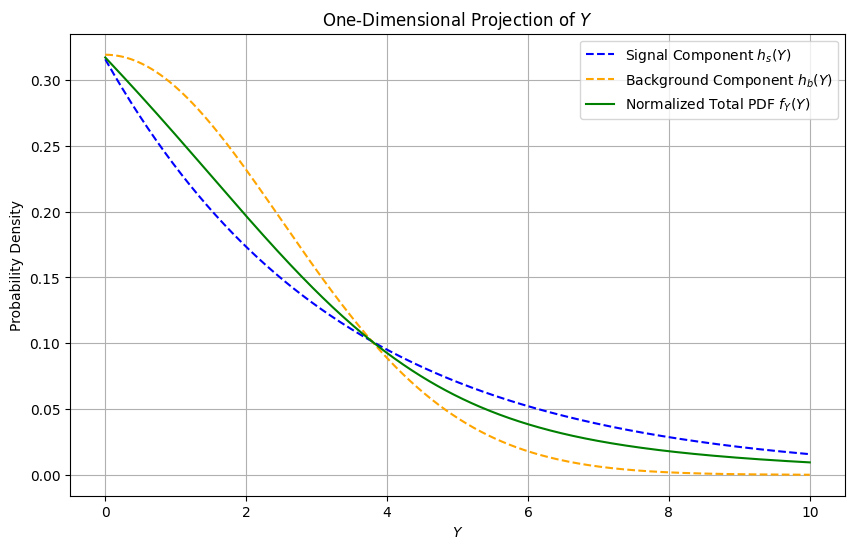

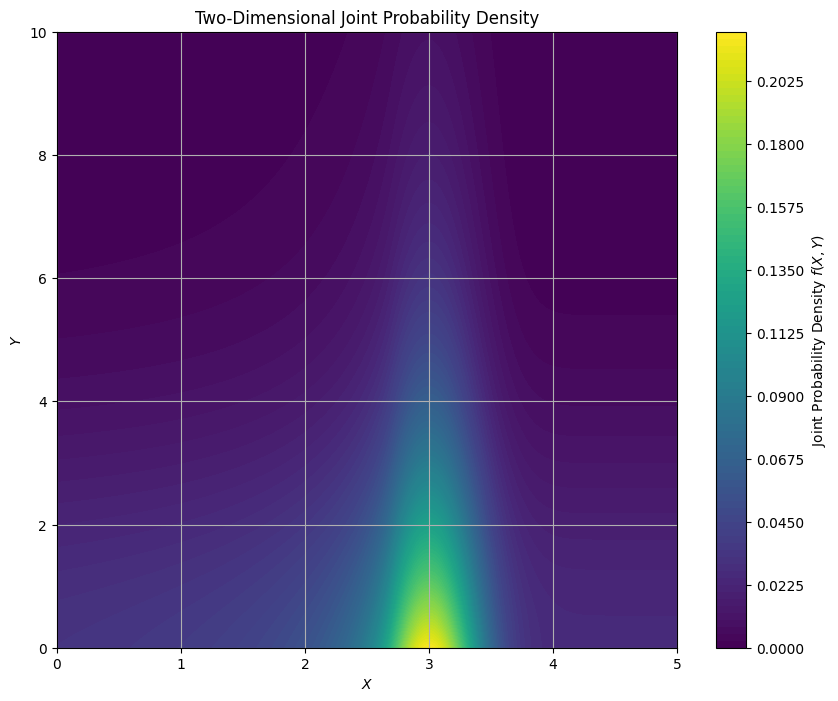

In [ ]:

# 1. Define 1D normalized projections for X
x_values = np.linspace(0, 5, 500)

# Normalized f_X(X) using integration over Y
f_x_values = np.array([quad(lambda y: f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal), 0, 10)[0] for x in x_values])

# Signal and background components for X (as visual aids)
g_s_values = np.array([g_s(x, mu, sigma, beta, m) for x in x_values])
g_b_values = np.array([g_b(x) for x in x_values])

# Plot 1D projection for X
plt.figure(figsize=(10, 6))
plt.plot(x_values, g_s_values, label='Signal Component $g_s(X)$', linestyle='--', color='blue')
plt.plot(x_values, g_b_values, label='Background Component $g_b(X)$', linestyle='--', color='orange')
plt.plot(x_values, f_x_values, label='Normalized Total PDF $f_X(X)$', color='green')
plt.title("One-Dimensional Projection of $X$")
plt.xlabel("$X$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# 2. Define 1D normalized projections for Y
y_values = np.linspace(0, 10, 500)

# Normalized f_Y(Y) using integration over X
f_y_values = np.array([quad(lambda x: f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal), 0, 5)[0] for y in y_values])

# Signal and background components for Y (as visual aids)
h_s_values = np.array([h_s(y, lambda_s) for y in y_values])
h_b_values = np.array([h_b(y, mu_b, sigma_b) for y in y_values])

# Plot 1D projection for Y
plt.figure(figsize=(10, 6))
plt.plot(y_values, h_s_values, label='Signal Component $h_s(Y)$', linestyle='--', color='blue')
plt.plot(y_values, h_b_values, label='Background Component $h_b(Y)$', linestyle='--', color='orange')
plt.plot(y_values, f_y_values, label='Normalized Total PDF $f_Y(Y)$', color='green')
plt.title("One-Dimensional Projection of $Y$")
plt.xlabel("$Y$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# 3. Two-dimensional joint probability density f(X, Y)
x_grid, y_grid = np.meshgrid(x_values, y_values)
f_xy_grid = np.array([[f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal)
                       for x in x_values] for y in y_values])

# Plot 2D joint probability density
plt.figure(figsize=(10, 8))
plt.contourf(x_grid, y_grid, f_xy_grid, levels=100, cmap='viridis')
plt.colorbar(label='Joint Probability Density $f(X, Y)$')
plt.title("Two-Dimensional Joint Probability Density")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import truncnorm
from scipy.integrate import quad
from timeit import timeit

# Sampling function
def sample_f_xy(n_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal):
    samples_x, samples_y = [], []
    while len(samples_x) < n_samples:
        if np.random.rand() < f_signal:  # Signal component
            x = np.random.uniform(0, 5)
            y = np.random.uniform(0, 10)
            if np.random.rand() < g_s(x, mu, sigma, beta, m) * h_s(y, lambda_s):
                samples_x.append(x)
                samples_y.append(y)
        else:  # Background component
            x = np.random.uniform(0, 5)
            y = np.random.uniform(0, 10)
            if np.random.rand() < g_b(x) * h_b(y, mu_b, sigma_b):
                samples_x.append(x)
                samples_y.append(y)
    return np.array(samples_x), np.array(samples_y)

# Extended likelihood function
def extended_likelihood(params, x_data, y_data, n_total):
    mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, n_extended = params
    f_values = np.array([f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal)
                         for x, y in zip(x_data, y_data)])
    extended_term = n_total * np.log(n_extended) - n_extended
    likelihood_term = np.sum(np.log(f_values))
    return -(extended_term + likelihood_term)

# Fit function
def perform_fit(x_data, y_data, n_total):
    # Slightly varied initial parameters
    initial_params = [3.1, 0.35, 0.9, 1.5, 0.28, -0.2, 2.8, 0.65, 95000]
    
    # Parameter bounds
    bounds = [
        (2.5, 3.5),   # mu
        (0.1, 0.5),   # sigma
        (0.5, 2),     # beta
        (1.1, 2),     # m
        (0.1, 0.5),   # lambda_s
        (-1, 1),      # mu_b
        (1, 4),       # sigma_b
        (0.3, 0.8),   # f_signal
        (n_total * 0.9, n_total * 1.1)  # n_extended
    ]
    
    # Minimize the negative log-likelihood
    result = minimize(
        extended_likelihood,
        initial_params,
        args=(x_data, y_data, n_total),
        bounds=bounds,
        method='L-BFGS-B'
    )
    
    # Extract fitted parameters
    fitted_params = result.x
    print("Fitted Parameters:")
    print(f"mu = {fitted_params[0]:.3f}, sigma = {fitted_params[1]:.3f}, beta = {fitted_params[2]:.3f}, m = {fitted_params[3]:.3f}")
    print(f"lambda_s = {fitted_params[4]:.3f}, mu_b = {fitted_params[5]:.3f}, sigma_b = {fitted_params[6]:.3f}, f_signal = {fitted_params[7]:.3f}, n_extended = {fitted_params[8]:.3f}")
    
    # Calculate errors using the inverse Hessian matrix
    try:
        errors = np.sqrt(np.diag(result.hess_inv.todense()))
        print("Parameter Errors:")
        print(errors)
    except:
        print("Error: Could not calculate errors from the Hessian matrix.")
        errors = None
    
    return fitted_params, errors

# Benchmark function
def benchmark():
    n_samples = 50
    baseline_time = timeit("np.random.normal(size=100000)", globals=globals(), number=100) / 100
    sample_time = timeit(lambda: sample_f_xy(n_samples, 3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6), number=100) / 100
    x_data, y_data = sample_f_xy(n_samples, 3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6)
    fit_time = timeit(lambda: perform_fit(x_data, y_data, n_samples), number=1)  # Perform fit only once
    return baseline_time, sample_time, fit_time


# Run benchmark and fit
baseline, sample, fit = benchmark()
print(f"Baseline (np.random.normal): {baseline:.6f} s")
print(f"Sampling: {sample:.6f} s ({sample / baseline:.2f}x)")
print(f"Fitting: {fit:.6f} s ({fit / baseline:.2f}x)")


In [6]:
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from multiprocessing import Pool, cpu_count
import numpy as np
from timeit import timeit


# Precompute Marginal Distributions
def precompute_marginals(mu, sigma, beta, m, lambda_s, mu_b, sigma_b):
    x_grid = np.linspace(0, 5, 500)
    y_grid = np.linspace(0, 10, 500)
    
    g_s_values = np.array([g_s(x, mu, sigma, beta, m) for x in x_grid])
    h_s_values = np.array([h_s(y, lambda_s) for y in y_grid])
    g_b_values = np.array([g_b(x) for x in x_grid])
    h_b_values = np.array([h_b(y, mu_b, sigma_b) for y in y_grid])
    
    g_s_interp = interp1d(x_grid, g_s_values, kind="linear", bounds_error=False, fill_value=0)
    h_s_interp = interp1d(y_grid, h_s_values, kind="linear", bounds_error=False, fill_value=0)
    g_b_interp = interp1d(x_grid, g_b_values, kind="linear", bounds_error=False, fill_value=0)
    h_b_interp = interp1d(y_grid, h_b_values, kind="linear", bounds_error=False, fill_value=0)
    
    return g_s_interp, h_s_interp, g_b_interp, h_b_interp


# Optimized Sampling Function
def sample_f_xy_optimized(n_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_interp, h_s_interp, g_b_interp, h_b_interp):
    samples_x, samples_y = [], []
    n_batch = 10 * n_samples  # Batch size to reduce iteration overhead

    while len(samples_x) < n_samples:
        is_signal = np.random.rand(n_batch) < f_signal
        x_candidates = np.random.uniform(0, 5, n_batch)
        y_candidates = np.random.uniform(0, 10, n_batch)

        # Signal acceptance
        signal_mask = is_signal
        if signal_mask.sum() > 0:
            signal_acceptance = g_s_interp(x_candidates[signal_mask]) * h_s_interp(y_candidates[signal_mask])
            accepted_signal = np.random.rand(signal_mask.sum()) < signal_acceptance
            samples_x.extend(x_candidates[signal_mask][accepted_signal])
            samples_y.extend(y_candidates[signal_mask][accepted_signal])

        # Background acceptance
        background_mask = ~is_signal
        if background_mask.sum() > 0:
            background_acceptance = g_b_interp(x_candidates[background_mask]) * h_b_interp(y_candidates[background_mask])
            accepted_background = np.random.rand(background_mask.sum()) < background_acceptance
            samples_x.extend(x_candidates[background_mask][accepted_background])
            samples_y.extend(y_candidates[background_mask][accepted_background])

    samples_x = np.array(samples_x[:n_samples])
    samples_y = np.array(samples_y[:n_samples])
    return samples_x, samples_y


# Parallel Sampling Function
def parallel_sample_f_xy_optimized(n_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_interp, h_s_interp, g_b_interp, h_b_interp):
    n_processes = cpu_count()  # Use all available CPU cores
    batch_size = n_samples // n_processes

    args = [
        (batch_size, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_interp, h_s_interp, g_b_interp, h_b_interp)
        for _ in range(n_processes)
    ]

    with Pool(processes=n_processes) as pool:
        results = pool.starmap(sample_f_xy_optimized, args)

    samples_x = np.concatenate([result[0] for result in results])
    samples_y = np.concatenate([result[1] for result in results])
    return samples_x, samples_y


# Extended Likelihood Function
def extended_likelihood(params, x_data, y_data, n_total):
    mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, n_extended = params
    f_values = np.array([
        f_xy(x, y, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal)
        for x, y in zip(x_data, y_data)
    ])
    extended_term = n_total * np.log(n_extended) - n_extended
    likelihood_term = np.sum(np.log(f_values))
    return -(extended_term + likelihood_term)


# Perform Fit Function
def perform_fit(x_data, y_data, n_total):
    initial_params = [3.1, 0.35, 0.9, 1.5, 0.28, -0.2, 2.8, 0.65, n_total]
    bounds = [
        (2.5, 3.5), (0.1, 0.5), (0.5, 2), (1.1, 2), (0.1, 0.5),
        (-1, 1), (1, 4), (0.3, 0.8), (n_total * 0.9, n_total * 1.1)
    ]

    result = minimize(
        extended_likelihood,
        initial_params,
        args=(x_data, y_data, n_total),
        bounds=bounds,
        method="L-BFGS-B"
    )

    fitted_params = result.x
    print("\nFitted Parameters:")
    print(f"mu = {fitted_params[0]:.3f}, sigma = {fitted_params[1]:.3f}, beta = {fitted_params[2]:.3f}, m = {fitted_params[3]:.3f}")
    print(f"lambda_s = {fitted_params[4]:.3f}, mu_b = {fitted_params[5]:.3f}, sigma_b = {fitted_params[6]:.3f}, f_signal = {fitted_params[7]:.3f}, n_extended = {fitted_params[8]:.3f}")

    try:
        errors = np.sqrt(np.diag(result.hess_inv.todense()))
        print("\nParameter Errors:")
        print(errors)
    except Exception as e:
        print(f"Error calculating errors: {e}")
        errors = None

    return fitted_params, errors


# Benchmark Function
def benchmark():
    n_samples = 100
    mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal = 3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6

    # Precompute marginals
    g_s_interp, h_s_interp, g_b_interp, h_b_interp = precompute_marginals(mu, sigma, beta, m, lambda_s, mu_b, sigma_b)

    # Measure baseline
    baseline_time = timeit("np.random.normal(size=100000)", globals=globals(), number=100) / 100
    print(f"Baseline (np.random.normal): {baseline_time:.6f}s")

    # Measure sampling
    sample_time = timeit(
        lambda: parallel_sample_f_xy_optimized(
            n_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_interp, h_s_interp, g_b_interp, h_b_interp
        ),
        number=10
    ) / 10
    print(f"Sampling: {sample_time:.6f}s ({sample_time / baseline_time:.2f}x)")

    # Perform sampling
    x_data, y_data = parallel_sample_f_xy_optimized(
        n_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_interp, h_s_interp, g_b_interp, h_b_interp
    )

    # Measure fitting
    fit_time = timeit(lambda: perform_fit(x_data, y_data, n_samples), number=1)
    print(f"Fitting: {fit_time:.6f}s")

    # Fit and print parameters
    perform_fit(x_data, y_data, n_samples)


# Main Entry Point
if __name__ == "__main__":
    benchmark()


Baseline (np.random.normal): 0.001592s


Process SpawnPoolWorker-33:
Process SpawnPoolWorker-36:
Process SpawnPoolWorker-35:
Traceback (most recent call last):
Traceback (most recent call last):
Process SpawnPoolWorker-34:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/anaconda3/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'sample_f_xy_optimized' on <module '__main__' (built-in)>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.

KeyboardInterrupt: 